# <img style="float: left; padding-right: 5px; width: 200px" src="https://assets.entrepreneur.com/images/misc/1584487204_LOGOCODOS_fondoblanco-01.png?width=300">
#Data Science & Machine Learning Engineer Interview

## Take Home: New or Used


### Julio 2023

<hr style="height:2pt">

# MercadoLibre: Nuevo o Usado

El presente _notebook_ contiene el ejercicio de las tareas detalladas en el _notebook_ _DS_MLE_TakeHome_NewOrUsed_202307.ipynb_ para la evaluación técnica para _Data Science & Machine Learning Engineer Interview_.


# Imports

In [9]:
import pandas as pd
import numpy as np
from joblib import dump
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.compose import make_column_selector, ColumnTransformer, make_column_transformer
from sklearn.neural_network import MLPClassifier
from sklearn.compose import make_column_selector as selector
import json
from ydata_profiling import ProfileReport

# Load dataset

In [2]:
# You can safely assume that `build_dataset` is correctly implemented
def build_dataset():
    data = [json.loads(x) for x in open("MLA_100k.jsonlines")]
    target = lambda x: x.get("condition")
    N = -10000
    X_train = data[:N]
    X_test = data[N:]
    y_train = [target(x) for x in X_train]
    y_test = [target(x) for x in X_test]
    for x in X_test:
        del x["condition"]
    return X_train, y_train, X_test, y_test

def build_whole_dataset():
    return [json.loads(x) for x in open("MLA_100k.jsonlines")]

In [3]:
new_or_used_dataset_pd = None
new_or_used_dataset_pd = pd.DataFrame(build_whole_dataset())

# EDA

## Shape

In [4]:
new_or_used_dataset_pd.shape

(100000, 48)

## Profile Report

In [6]:
profile = ProfileReport(new_or_used_dataset_pd.sample(n=20000))
profile.to_file(output_file='ml_new_or_used_profile_report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
# Head
pd.set_option('display.max.columns', None)
new_or_used_dataset_pd.head(50)

,seller_address,warranty,sub_status,condition,seller_contact,deal_ids,base_price,shipping,non_mercado_pago_payment_methods,seller_id,variations,location,site_id,listing_type_id,price,attributes,buying_mode,tags,listing_source,parent_item_id,coverage_areas,category_id,descriptions,last_updated,international_delivery_mode,pictures,id,official_store_id,differential_pricing,accepts_mercadopago,original_price,currency_id,thumbnail,title,automatic_relist,date_created,secure_thumbnail,stop_time,status,video_id,catalog_product_id,subtitle,initial_quantity,start_time,permalink,geolocation,sold_quantity,available_quantity
0,"{'comment': '', 'longitude': -58.3986709, 'id'...",None,[],new,None,[],80.00,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",74952096,[],{},MLA,bronze,80.00,[],buy_it_now,[dragged_bids_and_visits],,MLA568261029,[],MLA126406,[{'id': 'MLA578052519-912855983'}],2015-09-05T20:42:58.000Z,none,"[{'size': '500x375', 'secure_url': 'https://a2...",MLA578052519,NaN,None,True,NaN,ARS,http://mla-s1-p.mlstatic.com/5386-MLA435206787...,Auriculares Samsung Originales Manos Libres Ca...,False,2015-09-05T20:42:53.000Z,https://a248.e.akamai.net/mla-s1-p.mlstatic.co...,2015-11-04T20:42:53.000Z,active,None,NaN,None,1,2015-09-05T20:42:53.000Z,http://articulo.mercadolibre.com.ar/MLA-578052...,"{'latitude': -34.6280698, 'longitude': -58.398...",0,1
1,"{'comment': '', 'longitude': -58.5059173, 'id'...",NUESTRA REPUTACION,[],used,None,[],2650.00,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",42093335,[],{},MLA,silver,2650.00,[],buy_it_now,[],,MLA561574487,[],MLA10267,[{'id': 'MLA581565358-930764806'}],2015-09-26T18:08:34.000Z,none,"[{'size': '499x334', 'secure_url': 'https://a2...",MLA581565358,NaN,None,True,NaN,ARS,http://mla-s1-p.mlstatic.com/23223-MLA20245018...,Cuchillo Daga Acero Carbón Casco Yelmo Solinge...,False,2015-09-26T18:08:30.000Z,https://a248.e.akamai.net/mla-s1-p.mlstatic.co...,2015-11-25T18:08:30.000Z,active,None,NaN,None,1,2015-09-26T18:08:30.000Z,http://articulo.mercadolibre.com.ar/MLA-581565...,"{'latitude': -34.5935524, 'longitude': -58.505...",0,1
2,"{'comment': '', 'longitude': -58.4143948, 'id'...",None,[],used,None,[],60.00,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",133384258,[],{},MLA,bronze,60.00,[],buy_it_now,[dragged_bids_and_visits],,MLA568881256,[],MLA1227,[{'id': 'MLA578780872-916478256'}],2015-09-09T23:57:10.000Z,none,"[{'size': '375x500', 'secure_url': 'https://a2...",MLA578780872,NaN,None,True,NaN,ARS,http://mla-s1-p.mlstatic.com/22076-MLA20223367...,"Antigua Revista Billiken, N° 1826, Año 1954",False,2015-09-09T23:57:07.000Z,https://a248.e.akamai.net/mla-s1-p.mlstatic.co...,2015-11-08T23:57:07.000Z,active,None,NaN,None,1,2015-09-09T23:57:07.000Z,http://articulo.mercadolibre.com.ar/MLA-578780...,"{'latitude': -34.6233907, 'longitude': -58.414...",0,1
3,"{'comment': '', 'longitude': -58.4929208, 'id'...",None,[],new,None,[],580.00,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",143001605,[],{},MLA,silver,580.00,[],buy_it_now,[],,None,[],MLA86345,[{'id': 'MLA581877385-932309698'}],2015-10-05T16:03:50.306Z,none,"[{'size': '441x423', 'secure_url': 'https://a2...",MLA581877385,NaN,None,True,NaN,ARS,http://mla-s2-p.mlstatic.com/183901-MLA2043288...,Alarma Guardtex Gx412 Seguridad Para El Automo...,False,2015-09-28T18:47:56.000Z,https://a248.e.akamai.net/mla-s2-p.mlstatic.co...,2015-12-04T01:13:16.000Z,active,None,NaN,None,1,2015-09-28T18:47:56.000Z,http://articulo.mercadolibre.com.ar/MLA-581877...,"{'latitude': -34.6281894, 'longitude': -58.492...",0,1
4,"{'comment': '', 'longitude': -58.5495042, 'id'...",MI REPUTACION.,[],used,None,[],30.00,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",96873449,[],{},MLA,bronze,30.00,[],buy_it_n

In [ ]:
# Info:
# Null counts
# Types
new_or_used_dataset_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 48 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   seller_address                    100000 non-null  object 
 1   warranty                          39104 non-null   object 
 2   sub_status                        100000 non-null  object 
 3   condition                         100000 non-null  object 
 4   seller_contact                    2219 non-null    object 
 5   deal_ids                          100000 non-null  object 
 6   base_price                        100000 non-null  float64
 7   shipping                          100000 non-null  object 
 8   non_mercado_pago_payment_methods  100000 non-null  object 
 9   seller_id                         100000 non-null  int64  
 10  variations                        100000 non-null  object 
 11  location                          100000 non-null  ob

In [ ]:
# Numerics description
new_or_used_dataset_pd.describe()

,base_price,seller_id,price,official_store_id,original_price,catalog_product_id,initial_quantity,sold_quantity,available_quantity
count,1.000000e+05,1.000000e+05,1.000000e+05,818.000000,143.000000,1.100000e+01,100000.000000,100000.000000,100000.000000
mean,5.252423e+04,8.425269e+07,5.252433e+04,206.443765,1593.341958,3.727643e+06,35.093370,2.396990,34.842380
std,8.623127e+06,5.497257e+07,8.623127e+06,128.252953,2245.798072,1.884698e+06,421.076196,42.685077,420.808403
min,8.400000e-01,1.304000e+03,8.400000e-01,1.000000,120.000000,9.440400e+04,1.000000,0.000000,1.000000
25%,9.000000e+01,3.953591e+07,9.000000e+01,84.000000,449.000000,3.050702e+06,1.000000,0.000000,1.000000
50%,2.500000e+02,7.631063e+07,2.500000e+02,216.000000,858.000000,5.093232e+06,1.000000,0.000000,1.000000
75%,8.000000e+02,1.325659e+08,8.000000e+02,312.750000,1500.000000,5.103216e+06,2.000000,0.000000,2.000000
max,2.222222e+09,1.946906e+08,2.222222e+09,446.000000,13999.000000,5.434513e+06,9999.000000,8676.000000,9999.000000


In [ ]:
# Profiling categoricals
new_or_used_dataset_pd[["warranty",
                        "condition",
                        "listing_type_id",
                        "buying_mode",
                        "international_delivery_mode",
                        "official_store_id",
                        "differential_pricing",
                        "accepts_mercadopago",
                        "currency_id",
                        "automatic_relist",
                        "category_id",
                         "status"]].nunique()

warranty                       10264
condition                          2
listing_type_id                    7
buying_mode                        3
international_delivery_mode        1
official_store_id                202
differential_pricing               0
accepts_mercadopago                2
currency_id                        2
automatic_relist                   2
category_id                    10907
status                             4
dtype: int64

### categorical_distributions

In [ ]:
# Categorical distributions
print(new_or_used_dataset_pd["condition"].value_counts())
print(new_or_used_dataset_pd["listing_type_id"].value_counts())
print(new_or_used_dataset_pd["currency_id"].value_counts())
print(new_or_used_dataset_pd["automatic_relist"].value_counts())
print(new_or_used_dataset_pd["status"].value_counts())
print(new_or_used_dataset_pd["sub_status"].value_counts())
print(new_or_used_dataset_pd["seller_contact"].value_counts())
print(new_or_used_dataset_pd["deal_ids"].value_counts())
print(new_or_used_dataset_pd["location"].value_counts())
print(new_or_used_dataset_pd["site_id"].value_counts())
print(new_or_used_dataset_pd["buying_mode"].value_counts())
print(new_or_used_dataset_pd["tags"].value_counts())
print(new_or_used_dataset_pd["listing_source"].value_counts())
print(new_or_used_dataset_pd["coverage_areas"].value_counts())
print(new_or_used_dataset_pd["category_id"].value_counts())
print(new_or_used_dataset_pd["international_delivery_mode"].value_counts())
print(new_or_used_dataset_pd["official_store_id"].value_counts())
print(new_or_used_dataset_pd["differential_pricing"].value_counts())
print(new_or_used_dataset_pd["accepts_mercadopago"].value_counts())
print(new_or_used_dataset_pd["automatic_relist"].value_counts())
print(new_or_used_dataset_pd["catalog_product_id"].value_counts())
print(new_or_used_dataset_pd["variations"].value_counts())
print(new_or_used_dataset_pd["attributes"].value_counts())

new     53758
used    46242
Name: condition, dtype: int64
bronze          63170
free            21388
silver           9114
gold_special     3023
gold             2445
gold_premium      842
gold_pro           18
Name: listing_type_id, dtype: int64
ARS    99433
USD      567
Name: currency_id, dtype: int64
False    95303
True      4697
Name: automatic_relist, dtype: int64
active            95675
paused             4304
closed               20
not_yet_active        1
Name: status, dtype: int64
[]             99014
[suspended]      966
[expired]         13
[deleted]          7
Name: sub_status, dtype: int64
{'area_code2': '', 'phone2': '', 'webpage': '', 'email': '', 'contact': '', 'area_code': '', 'other_info': '', 'phone': ''}                                                                      28
{'area_code2': '', 'phone2': '', 'webpage': '', 'email': 'consultas_ml@xintel.com.ar', 'contact': 'Gustavo Piccione Propiedades', 'area_code': '011', 'other_info': '', 'phone': '4623-4723'}    

### original_price_nans

In [ ]:
# Head numerical
new_or_used_dataset_pd[["base_price",
                        "price",
                        "original_price", # <--- Mostly NaNs
                        "initial_quantity",
                        "sold_quantity",
                        "available_quantity"
                        ]].head(100)

,base_price,price,original_price,initial_quantity,sold_quantity,available_quantity
0,80.00,80.00,NaN,1,0,1
1,2650.00,2650.00,NaN,1,0,1
2,60.00,60.00,NaN,1,0,1
3,580.00,580.00,NaN,1,0,1
4,30.00,30.00,NaN,1,0,1
...,...,...,...,...,...,...
95,2499.00,2499.00,NaN,1,0,1
96,5239.00,5239.00,NaN,2,0,2
97,3968.72,3968.72,NaN,2,0,2
98,600.00,600.00,NaN,1,0,1


In [ ]:
# Correlations
new_or_used_dataset_pd[["base_price",
                        "price",
                        "original_price",
                        "initial_quantity",
                        "sold_quantity",
                        "available_quantity"
                        ]].corr()

,base_price,price,original_price,initial_quantity,sold_quantity,available_quantity
base_price,1.000000,1.000000,0.994437,-0.000362,-0.000337,-0.000359
price,1.000000,1.000000,0.994437,-0.000362,-0.000337,-0.000359
original_price,0.994437,0.994437,1.000000,0.167619,0.133158,0.167294
initial_quantity,-0.000362,-0.000362,0.167619,1.000000,0.057291,0.999948
sold_quantity,-0.000337,-0.000337,0.133158,0.057291,1.000000,0.051786
available_quantity,-0.000359,-0.000359,0.167294,0.999948,0.051786,1.000000


### deep_dive_attributes

In [ ]:
## Deep dive, Attributes
pd.set_option('display.max_colwidth', None)
df = pd.DataFrame(new_or_used_dataset_pd["attributes"][99997])
df

,value_id,attribute_group_id,name,value_name,attribute_group_name,id
0,male,DFLT,Género,Hombre,Otros,GENDER
1,Season-Autumn-Winter,FIND,Season,Autumn-Winter,Ficha técnica,Season


## Variables enum & observations

# Data QA
## _Highlights_ generales basadas en el [EDA](ml_new_or_used_profile_report.html)

- El dataset contiene 100,000 registros de productos cubriendo 48 campos, con información de 2014-2015; se asumen entonces como datos históricos, actualizados hasta tales fechas.
- El dataset corresponde a información de productos de un mercado específico (_site_id_ = MLA).
- El campo objetivo (_condition_) abstrae dos clases, y está relativamente balanceado respecto a la muestra (new 53758, used 46242).

En general, el dataset se puede considerar adecuado para una tarea de clasificación (dado que sus campos proveen información descriptiva relevante para determinar su condición), aunque se deben subsanar algunas carencias en campos importantes, así como un procedimiento para perfilar features previo al algoritmo de clasificación.

# Reporting

- Algunos campos contienen datos compuestos que requieren un análisis más profundo dado su nivel granularidad (e.g.: [_attributtes_](###deep_dive_attributes), _shipping_, _variations_, _pictures_). Es probable que estos campos provean de features relevantes para la clasificación.
- Existen campos que por la cantidad de nulos que contienen y lo escueto de su descripción no proveen mucha información para ser utilizados como features de clasificación (e.g.: _deal_ids_, _tags_, _international_delivery_mode_). Es importante obtener más información de estos campos.
- Algunos campos numéricos muestran alta correlación entre sí (_price_, _original_price_, _base_price_), y uno tiene en su mayora datos _NaN_ ([_original_price_](###original_price_nans)). 
- Hay campos relevantes completamente vacíos (_listing_source_, _coverage_areas_, _subtitle_). Se debe verificar su procedencia.
- La prevalencia de campos categóricos descriptores del producto supone la inlcusión de codificación estos campos en variables categóricas (incluyendo los campos booleanos).
- Los campos con datos tipo _timestamp_ requieren procesarse para denotar períodos.
- Los descriptores de texto (_warranty_, _title_) requieren un procesamiento de lenguaje natural para identificar características relevantes.
- Los datos multimedia (video, imágenes) que contiene el dataset requieren un procesamiento con algoritmos convolutivos para extraer descriptores relevantes.
- Algunos campos categóricos muestran distribuciones muy sesgadas entre sus categorías ([_Categorical Distributions_](###categorical_distributions), e.g: _status_: active-95675, paused-4304, closed-20, not_yet_active-1) lo cual puede restarles relevancia en la tarea de clasificación.

# Feature Engineering

In [6]:
new_or_used_dataset_featured_pd = new_or_used_dataset_pd

In [7]:
new_or_used_dataset_featured_pd['sub_status_2']  = [''.join(map(str, l)) for l in new_or_used_dataset_featured_pd['sub_status']]

# Categoricals to booleans.
new_or_used_dataset_featured_pd['has_warranty'] = np.where(new_or_used_dataset_featured_pd['warranty'].isnull(), False, True)
new_or_used_dataset_featured_pd['has_parent_item'] = np.where(new_or_used_dataset_featured_pd['parent_item_id'].isnull(), False, True)
new_or_used_dataset_featured_pd['has_official_store'] = np.where(new_or_used_dataset_featured_pd['official_store_id'].isnull(), False, True)
new_or_used_dataset_featured_pd['has_video'] = np.where(new_or_used_dataset_featured_pd['video_id'].isnull(), False, True)
new_or_used_dataset_featured_pd['has_variations'] = np.where(new_or_used_dataset_featured_pd['variations'].size == 0, False, True)

# Machine Learning Modeling

- Se consideran dos tipos de clasificadores: _GradientBoosting_ & _MLP_ (con parametrizaciones estándar y ajustadas), así como conbinaciones de subsets con campos numéricos (con distintos procedimientos de _scaling_) y/o categóricos (incluyendo aquellos determinados en la fase de _Feature Engineering_). 
- Se iteraron 10 _Pipelines_ que corresponden con las versiones de los modelos guardados en formato _new_or_used_vX.joblib_. La siguiente gráfica resume el versionado de la experimentación de los modelos.

| Version | Model | Numerical Features | Categorical Features | Transformation | Accuracy | Class Precision | Cross-validation |
| --- | --- | --- | --- | --- | --- | --- | --- |
| _new_or_used_v1_ | Vanilla GradientBoostingClassifier | "base_price", "price", "initial_quantity", "sold_quantity" | None | MinMaxScaler | 0.76 | (0.92, 0.67) | N/A |
| _new_or_used_v2_ | Vanilla GradientBoostingClassifier | "base_price", "price", "initial_quantity", "sold_quantity" | None | None | 0.77 | (0.90, 0.69) | N/A |
| _new_or_used_v3_ | Vanilla GradientBoostingClassifier | "base_price", "price", "initial_quantity", "sold_quantity", "available_quantity" | "listing_type_id", ,"buying_mode",  "accepts_mercadopago",  "automatic_relist", "status", "currency_id" | OneHotEncoder | 0.82 | (0.83, 0.81) | N/A |
| _new_or_used_v4_ | Tuned GradientBoostingClassifier | "base_price", "price", "initial_quantity", "sold_quantity", "available_quantity" | "listing_type_id", ,"buying_mode",  "accepts_mercadopago",  "automatic_relist", "status", "currency_id" | OneHotEncoder | 0.82 | (0.84, 0.80) | N/A |
| _new_or_used_v5_ | Tuned MLPClassifier | "base_price", "price", "initial_quantity", "sold_quantity", "available_quantity" | "listing_type_id", ,"buying_mode",  "accepts_mercadopago",  "automatic_relist", "status", "currency_id" | OneHotEncoder | 0.63 | (0.62, 0.68) | N/A |
| _new_or_used_v6_ | Vanilla GradientBoostingClassifier | "base_price", "price", "initial_quantity", "sold_quantity", "available_quantity" |     "listing_type_id", "buying_mode", "accepts_mercadopago", "automatic_relist", "status", "currency_id", "has_parent_item", "has_official_store", "has_video" | OneHotEncoder | 0.83 | (0.85, 0.80) | N/A |
| _new_or_used_v7_ | Tuned MLPClassifier | "base_price", "price", "initial_quantity", "sold_quantity", "available_quantity" |     "listing_type_id", "buying_mode", "accepts_mercadopago", "automatic_relist", "status", "currency_id", "has_parent_item", "has_official_store", "has_video" | OneHotEncoder | 0.67 | (0.90, 0.59) | N/A |
| _new_or_used_v8_ | Tuned GradientBoostingClassifier | "base_price", "price", "initial_quantity", "sold_quantity", "available_quantity" |     "listing_type_id", "buying_mode", "accepts_mercadopago", "automatic_relist", "status", "currency_id", "has_parent_item", "has_official_store", "has_video" | OneHotEncoder | 0.83 | (0.85, 0.80) | N/A |
| **_new_or_used_v9_** | Vanilla GradientBoostingClassifier | "base_price", "price", "initial_quantity", "sold_quantity", "available_quantity" | "listing_type_id" | OneHotEncoder, StandardScaler | 0.825 ± 0.002 | (0.83, 0.81) | k=5 |
| _new_or_used_v10_ | Vanilla GradientBoostingClassifier | "base_price", "price", "initial_quantity", "sold_quantity" | "listing_type_id", "has_parent_item" | OneHotEncoder, StandardScaler | 0.83 | (0.85, 0.80) | N/A |

- El subconjunto de entrenamiento considera alrededor de 2/3 del conjunto de datos, y el subconjunto de prueba el 1/3 restante.
- Considerando como **métrica** más importante el _accuracy_ y complementando con la precisión por clase (buscando el más alto y balanceado posible), se selecciona la iteración _new_or_used_v9_ como el más plausible en el _framework_ presente para la clasificación de la condición del producto, dadas su métricas y la cantidad de _features_ de _input_.
- La iteración _new_or_used_v10_ muestra un comportamiento peculiar, al seleccionar sólamente una variable categórica y cinco variables numéricas se llega a un _accuracy_ cercano al de la mejor iteración previa (_new_or_used_v9_). Es evidente que las variables numéricas aportan la mayor relevancia para la diferenciación de la condición del producto ([Feature Importances](#Feature-Importances)), por lo que resurge la inquietud a cerca de la variable _original_price_; no parece un comportamiento natural que la gran mayoría de los vectores del dataset (99857) tengan este campo como _NaN_. Este comportamiento requiere mayor consideración.
- También debe ser priorizada la extracción de características de los campos compuestos; en conjunto con fuentes externas, estos features también pueden ser relevantes (e.g.: el NSE respecto a la dirección geográfica puede capturar información sobre la condición del producto.)

## new_or_used_v1

In [ ]:
# new_or_used_v1, Vanilla GradientBoostingClassifier, numerical features only, MinMaxScaler

# Features
X = new_or_used_dataset_pd[["base_price", "price", "initial_quantity", "sold_quantity"]]
y = new_or_used_dataset_pd[["condition"]].values.ravel()

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# Train
clf_pipeline = [('scaling', MinMaxScaler()), ('clf', GradientBoostingClassifier())]
pipeline = Pipeline(clf_pipeline)

pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)

# Metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("Classification Report")
print(classification_report(y_test, predictions))

dump(pipeline, './new_or_used_v1.joblib')

(67000, 4)
(33000, 4)
(67000,)
(33000,)
Confusion Matrix:
[[10802  6951]
 [  985 14262]]
Classification Report
              precision    recall  f1-score   support

         new       0.92      0.61      0.73     17753
        used       0.67      0.94      0.78     15247

    accuracy                           0.76     33000
   macro avg       0.79      0.77      0.76     33000
weighted avg       0.80      0.76      0.75     33000



['./new_or_used_v1.joblib']

## new_or_used_v2

In [ ]:
# new_or_used_v2, Vanilla GradientBoostingClassifier, numerical features only, w/o scaling

# Features
X = new_or_used_dataset_pd[["base_price", "price", "initial_quantity", "sold_quantity"]]
y = new_or_used_dataset_pd[["condition"]].values.ravel()

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# Train
clf_pipeline = [('clf', GradientBoostingClassifier())]
pipeline = Pipeline(clf_pipeline)

pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)

# Metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("Classification Report")
print(classification_report(y_test, predictions))

dump(pipeline, './new_or_used_v2.joblib')

(67000, 4)
(33000, 4)
(67000,)
(33000,)
Confusion Matrix:
[[11520  6233]
 [ 1265 13982]]
Classification Report
              precision    recall  f1-score   support

         new       0.90      0.65      0.75     17753
        used       0.69      0.92      0.79     15247

    accuracy                           0.77     33000
   macro avg       0.80      0.78      0.77     33000
weighted avg       0.80      0.77      0.77     33000



['./new_or_used_v2.joblib']

## new_or_used_v3

In [ ]:
# new_or_used_v3, Vanilla GradientBoostingClassifier, Categorical One-Hot

# Features
y = new_or_used_dataset_pd[["condition"]].values.ravel()

categorical_columns_subset = [
    "listing_type_id",
    "buying_mode",
    "accepts_mercadopago",
    "automatic_relist",
    "status",
    "currency_id"
]

numerical_columns_subset = [
    "base_price",
    "price",
    # "original_price", # Has NaNs
    "initial_quantity",
    "sold_quantity",
    "available_quantity"
]

X = new_or_used_dataset_pd[categorical_columns_subset + numerical_columns_subset]
X[categorical_columns_subset] = X[categorical_columns_subset].astype("category")

categorical_columns = X.select_dtypes(include="category").columns
n_categorical_features = len(categorical_columns)
n_numerical_features = X.select_dtypes(include="number").shape[1]

print(f"Number of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")
print(f"Number of categorical features: {n_categorical_features}")
print(f"Number of numerical features: {n_numerical_features}")

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# Train
one_hot_encoder = make_column_transformer(
    (
        OneHotEncoder(sparse=False, handle_unknown="ignore"),
        make_column_selector(dtype_include="category"),
    ),
    remainder="passthrough",
)

one_hot = make_pipeline(
    one_hot_encoder, GradientBoostingClassifier()
)

pipeline = one_hot

pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)

# Metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("Classification Report")
print(classification_report(y_test, predictions))

dump(pipeline, './new_or_used_v3.joblib')

C:\Users\Oko\AppData\Local\Temp\ipykernel_27696\381209876.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[categorical_columns_subset] = X[categorical_columns_subset].astype("category")


Number of samples: 100000
Number of features: 11
Number of categorical features: 6
Number of numerical features: 5
(67000, 11)
(33000, 11)
(67000,)
(33000,)
Confusion Matrix:
[[14809  2944]
 [ 2937 12310]]
Classification Report
              precision    recall  f1-score   support

         new       0.83      0.83      0.83     17753
        used       0.81      0.81      0.81     15247

    accuracy                           0.82     33000
   macro avg       0.82      0.82      0.82     33000
weighted avg       0.82      0.82      0.82     33000



['./new_or_used_v3.joblib']

## new_or_used_v4

In [ ]:
# new_or_used_v4, Tuned GradientBoostingClassifier, Categorical One-Hot
y = new_or_used_dataset_pd[["condition"]].values.ravel()

# Features
categorical_columns_subset = [
    "listing_type_id",
    "buying_mode",
    "accepts_mercadopago",
    "automatic_relist",
    "status",
    "currency_id"
]

numerical_columns_subset = [
    "base_price",
    "price",
    "initial_quantity",
    "sold_quantity",
    "available_quantity"
]

X = new_or_used_dataset_pd[categorical_columns_subset + numerical_columns_subset]
X[categorical_columns_subset] = X[categorical_columns_subset].astype("category")

categorical_columns = X.select_dtypes(include="category").columns
n_categorical_features = len(categorical_columns)
n_numerical_features = X.select_dtypes(include="number").shape[1]

print(f"Number of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")
print(f"Number of categorical features: {n_categorical_features}")
print(f"Number of numerical features: {n_numerical_features}")

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# Train
one_hot_encoder = make_column_transformer(
    (
        OneHotEncoder(sparse=False, handle_unknown="ignore"),
        make_column_selector(dtype_include="category"),
    ),
    remainder="passthrough",
)

hist_one_hot = make_pipeline(
    one_hot_encoder, GradientBoostingClassifier(learning_rate=0.01, n_estimators=1000)
)

pipeline = hist_one_hot

pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)

# Metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("Classification Report")
print(classification_report(y_test, predictions))

dump(pipeline, './new_or_used_v4.joblib')

C:\Users\Oko\AppData\Local\Temp\ipykernel_27696\508765325.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[categorical_columns_subset] = X[categorical_columns_subset].astype("category")


Number of samples: 100000
Number of features: 11
Number of categorical features: 6
Number of numerical features: 5
(67000, 11)
(33000, 11)
(67000,)
(33000,)
Confusion Matrix:
[[14682  3071]
 [ 2770 12477]]
Classification Report
              precision    recall  f1-score   support

         new       0.84      0.83      0.83     17753
        used       0.80      0.82      0.81     15247

    accuracy                           0.82     33000
   macro avg       0.82      0.82      0.82     33000
weighted avg       0.82      0.82      0.82     33000



['./new_or_used_v4.joblib']

## new_or_used_v5

In [ ]:
# new_or_used_v5, Tuned MLPClassifier, Categorical One-Hot
y = new_or_used_dataset_pd[["condition"]].values.ravel()

# Features
categorical_columns_subset = [
    "listing_type_id",
    "buying_mode",
    "accepts_mercadopago",
    "automatic_relist",
    "status",
    "currency_id"
]

numerical_columns_subset = [
    "base_price",
    "price",
    "initial_quantity",
    "sold_quantity",
    "available_quantity"
]

X = new_or_used_dataset_pd[categorical_columns_subset + numerical_columns_subset]
X[categorical_columns_subset] = X[categorical_columns_subset].astype("category")

categorical_columns = X.select_dtypes(include="category").columns
n_categorical_features = len(categorical_columns)
n_numerical_features = X.select_dtypes(include="number").shape[1]

print(f"Number of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")
print(f"Number of categorical features: {n_categorical_features}")
print(f"Number of numerical features: {n_numerical_features}")

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# Train
one_hot_encoder = make_column_transformer(
    (
        OneHotEncoder(sparse=False, handle_unknown="ignore"),
        make_column_selector(dtype_include="category"),
    ),
    remainder="passthrough",
)

MLP_one_hot = make_pipeline(
    one_hot_encoder,
    MLPClassifier(max_iter=1000, tol=0.00001, n_iter_no_change=100)
)

pipeline = MLP_one_hot

pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)

# Metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("Classification Report")
print(classification_report(y_test, predictions))

dump(pipeline, './new_or_used_v5.joblib')

C:\Users\Oko\AppData\Local\Temp\ipykernel_27696\3198665065.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[categorical_columns_subset] = X[categorical_columns_subset].astype("category")


Number of samples: 100000
Number of features: 11
Number of categorical features: 6
Number of numerical features: 5
(67000, 11)
(33000, 11)
(67000,)
(33000,)
Confusion Matrix:
[[14793  2960]
 [ 9089  6158]]
Classification Report
              precision    recall  f1-score   support

         new       0.62      0.83      0.71     17753
        used       0.68      0.40      0.51     15247

    accuracy                           0.63     33000
   macro avg       0.65      0.62      0.61     33000
weighted avg       0.65      0.63      0.62     33000



['./new_or_used_v5.joblib']

## new_or_used_v6

In [ ]:
# new_or_used_v6, Vanilla GradientBoostingClassifier, Featured, Categorical One-Hot
y = new_or_used_dataset_featured_pd[["condition"]].values.ravel()

# Features
categorical_columns_subset = [
    "listing_type_id",
    "buying_mode",
    "accepts_mercadopago",
    "automatic_relist",
    "status",
    "currency_id",
    "has_parent_item",
    "has_official_store",
    "has_video"
]

numerical_columns_subset = [
    "base_price",
    "price",
    # "original_price", # Has NaNs
    "initial_quantity",
    "sold_quantity",
    "available_quantity"
]

X = new_or_used_dataset_featured_pd[categorical_columns_subset + numerical_columns_subset]
X[categorical_columns_subset] = X[categorical_columns_subset].astype("category")

categorical_columns = X.select_dtypes(include="category").columns
n_categorical_features = len(categorical_columns)
n_numerical_features = X.select_dtypes(include="number").shape[1]

print(f"Number of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")
print(f"Number of categorical features: {n_categorical_features}")
print(f"Number of numerical features: {n_numerical_features}")

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# Train
one_hot_encoder = make_column_transformer(
    (
        OneHotEncoder(sparse=False, handle_unknown="ignore"),
        make_column_selector(dtype_include="category"),
    ),
    remainder="passthrough",
)

hist_one_hot = make_pipeline(
    one_hot_encoder, GradientBoostingClassifier()
)

pipeline = hist_one_hot

pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)

# Metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("Classification Report")
print(classification_report(y_test, predictions))

dump(pipeline, './new_or_used_v6.joblib')

C:\Users\Oko\AppData\Local\Temp\ipykernel_27696\3657521151.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[categorical_columns_subset] = X[categorical_columns_subset].astype("category")


Number of samples: 100000
Number of features: 14
Number of categorical features: 9
Number of numerical features: 5
(67000, 14)
(33000, 14)
(67000,)
(33000,)
Confusion Matrix:
[[14585  3168]
 [ 2495 12752]]
Classification Report
              precision    recall  f1-score   support

         new       0.85      0.82      0.84     17753
        used       0.80      0.84      0.82     15247

    accuracy                           0.83     33000
   macro avg       0.83      0.83      0.83     33000
weighted avg       0.83      0.83      0.83     33000



['./new_or_used_v6.joblib']

## new_or_used_v7

In [ ]:
# new_or_used_v7, Tuned MLPClassifier, Featured, Categorical One-Hot
y = new_or_used_dataset_featured_pd[["condition"]].values.ravel()

# Features
categorical_columns_subset = [
    "listing_type_id",
    "buying_mode",
    "accepts_mercadopago",
    "automatic_relist",
    "status",
    "currency_id",
    "has_parent_item",
    "has_official_store",
    "has_video"    
]

numerical_columns_subset = [
    "base_price",
    "price",
    "initial_quantity",
    "sold_quantity",
    "available_quantity"
]

X = new_or_used_dataset_featured_pd[categorical_columns_subset + numerical_columns_subset]
X[categorical_columns_subset] = X[categorical_columns_subset].astype("category")

categorical_columns = X.select_dtypes(include="category").columns
n_categorical_features = len(categorical_columns)
n_numerical_features = X.select_dtypes(include="number").shape[1]

print(f"Number of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")
print(f"Number of categorical features: {n_categorical_features}")
print(f"Number of numerical features: {n_numerical_features}")

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# Train
one_hot_encoder = make_column_transformer(
    (
        OneHotEncoder(sparse=False, handle_unknown="ignore"),
        make_column_selector(dtype_include="category"),
    ),
    remainder="passthrough",
)

MLP_one_hot = make_pipeline(
    one_hot_encoder,
    MLPClassifier(max_iter=1000, tol=0.00001, n_iter_no_change=100)
)

pipeline = MLP_one_hot

pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)

# Metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("Classification Report")
print(classification_report(y_test, predictions))

dump(pipeline, './new_or_used_v7.joblib')

C:\Users\Oko\AppData\Local\Temp\ipykernel_27696\490356390.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[categorical_columns_subset] = X[categorical_columns_subset].astype("category")


Number of samples: 100000
Number of features: 14
Number of categorical features: 9
Number of numerical features: 5
(67000, 14)
(33000, 14)
(67000,)
(33000,)
Confusion Matrix:
[[ 7748 10005]
 [  900 14347]]
Classification Report
              precision    recall  f1-score   support

         new       0.90      0.44      0.59     17753
        used       0.59      0.94      0.72     15247

    accuracy                           0.67     33000
   macro avg       0.74      0.69      0.66     33000
weighted avg       0.75      0.67      0.65     33000



['./new_or_used_v7.joblib']

## new_or_used_v8

In [8]:
# new_or_used_v8, Tuned GradientBoostingClassifier, Featured, Categorical One-Hot
y = new_or_used_dataset_featured_pd[["condition"]].values.ravel()

# Features
categorical_columns_subset = [
    "listing_type_id",
    "buying_mode",
    "accepts_mercadopago",
    "automatic_relist",
    "status",
    "currency_id",
    "has_parent_item",
    "has_official_store",
    "has_video"
]

numerical_columns_subset = [
    "base_price",
    "price",
    # "original_price", # Has NaNs
    "initial_quantity",
    "sold_quantity",
    "available_quantity"
]

X = new_or_used_dataset_featured_pd[categorical_columns_subset + numerical_columns_subset]
X[categorical_columns_subset] = X[categorical_columns_subset].astype("category")

categorical_columns = X.select_dtypes(include="category").columns
n_categorical_features = len(categorical_columns)
n_numerical_features = X.select_dtypes(include="number").shape[1]

print(f"Number of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")
print(f"Number of categorical features: {n_categorical_features}")
print(f"Number of numerical features: {n_numerical_features}")

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# Train
one_hot_encoder = make_column_transformer(
    (
        OneHotEncoder(sparse=False, handle_unknown="ignore"),
        make_column_selector(dtype_include="category"),
    ),
    remainder="passthrough",
)

hist_one_hot = make_pipeline(
    one_hot_encoder, GradientBoostingClassifier(learning_rate=0.01, n_estimators=1000)
)

pipeline = hist_one_hot

pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)

# Metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("Classification Report")
print(classification_report(y_test, predictions))

dump(pipeline, './new_or_used_v8.joblib')

C:\Users\Oko\AppData\Local\Temp\ipykernel_2016\1483260471.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[categorical_columns_subset] = X[categorical_columns_subset].astype("category")


Number of samples: 100000
Number of features: 14
Number of categorical features: 9
Number of numerical features: 5
(67000, 14)
(33000, 14)
(67000,)
(33000,)
Confusion Matrix:
[[14640  3113]
 [ 2548 12699]]
Classification Report
              precision    recall  f1-score   support

         new       0.85      0.82      0.84     17753
        used       0.80      0.83      0.82     15247

    accuracy                           0.83     33000
   macro avg       0.83      0.83      0.83     33000
weighted avg       0.83      0.83      0.83     33000



['./new_or_used_v8.joblib']

## new_or_used_v9

In [5]:
# Subset
X = new_or_used_dataset_pd[["listing_type_id", "base_price", "price", "initial_quantity", "sold_quantity", "available_quantity"]]
target_name = "condition"
y = new_or_used_dataset_pd[target_name]

# Selectors
numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(X)
categorical_columns = categorical_columns_selector(X)

# Preprocessors
categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
numerical_preprocessor = StandardScaler()

preprocessor = ColumnTransformer(
    [
        ("one-hot-encoder", categorical_preprocessor, categorical_columns),
        ("standard_scaler", numerical_preprocessor, numerical_columns),
    ]
)

# Pipeline
model = make_pipeline(preprocessor, GradientBoostingClassifier())

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# Train
model.fit(X_train, y_train)
predictions = model.predict(X_test)

# Metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("Classification Report")
print(classification_report(y_test, predictions))

# Cross Validation
cv_results = cross_validate(model, X, y, cv=5)

scores = cv_results["test_score"]
print(
    "The mean cross-validation accuracy is: "
    f"{scores.mean():.3f} ± {scores.std():.3f}"
)

# Save
dump(model, './new_or_used_v9.joblib')

(67000, 6)
(33000, 6)
(67000,)
(33000,)
Confusion Matrix:
[[14815  2938]
 [ 2950 12297]]
Classification Report
              precision    recall  f1-score   support

         new       0.83      0.83      0.83     17753
        used       0.81      0.81      0.81     15247

    accuracy                           0.82     33000
   macro avg       0.82      0.82      0.82     33000
weighted avg       0.82      0.82      0.82     33000

The mean cross-validation accuracy is: 0.825 ± 0.002


## new_or_used_v10

### Feature Importances

In [81]:
# One Hot Encoded Features from v6
indexes = one_hot_encoder.transformers_[0][1].get_feature_names()
# Adding numerical features indexes
indexes = np.append(indexes, ["n1", "n2", "n3", "n4", "n5"], axis=0)
indexes

c:\Python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


array(['x0_bronze', 'x0_free', 'x0_gold', 'x0_gold_premium',
       'x0_gold_pro', 'x0_gold_special', 'x0_silver', 'x1_auction',
       'x1_buy_it_now', 'x1_classified', 'x2_False', 'x2_True',
       'x3_False', 'x3_True', 'x4_active', 'x4_closed',
       'x4_not_yet_active', 'x4_paused', 'x5_', 'x5_deleted',
       'x5_expired', 'x5_suspended', 'x6_ARS', 'x6_USD', 'x7_False',
       'x7_True', 'x8_False', 'x8_True', 'x9_False', 'x9_True',
       'x10_False', 'x10_True', 'x11_True', 'n1', 'n2', 'n3', 'n4', 'n5'],
      dtype=object)

<AxesSubplot:>

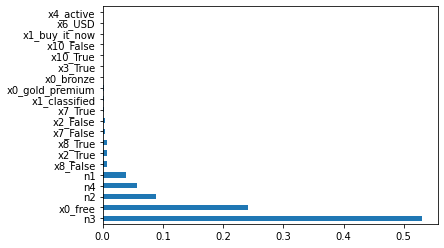

In [84]:
# Feature Importances
feat_importances = pd.Series(pipeline.steps[1][1].feature_importances_, index=indexes)
feat_importances.nlargest(20).plot(kind='barh')

In [79]:
# new_or_used_v100, Vanilla GradientBoostingClassifier, important features 
y = new_or_used_dataset_featured_pd[["condition"]].values.ravel()

# Important Features 
categorical_columns_subset = [
    "listing_type_id",
    # "buying_mode",
    # "accepts_mercadopago",
    # "automatic_relist",
    # "status",
    # "sub_status_2",
    # "currency_id",
    # "has_warranty",
    "has_parent_item"
    # "has_official_store",
    # "has_video", 
    # "has_variations"    
]

numerical_columns_subset = [
    "base_price",
    "price",
    "initial_quantity",
    "sold_quantity"
    # "available_quantity"
]

X = new_or_used_dataset_featured_pd[categorical_columns_subset + numerical_columns_subset]
X[categorical_columns_subset] = X[categorical_columns_subset].astype("category")

categorical_columns = X.select_dtypes(include="category").columns
n_categorical_features = len(categorical_columns)
n_numerical_features = X.select_dtypes(include="number").shape[1]

print(f"Number of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")
print(f"Number of categorical features: {n_categorical_features}")
print(f"Number of numerical features: {n_numerical_features}")

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# Train
one_hot_encoder = make_column_transformer(
    (
        OneHotEncoder(categories='auto', sparse=False, handle_unknown="ignore", ),
        make_column_selector(dtype_include="category"),
    ),
    remainder="passthrough",
)

one_hot = make_pipeline(
    one_hot_encoder, GradientBoostingClassifier()
)

pipeline = None
pipeline = one_hot

pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)

# Metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("Classification Report")
print(classification_report(y_test, predictions))

dump(pipeline, './new_or_used_v10.joblib')

C:\Users\Oko\AppData\Local\Temp\ipykernel_24528\2055728404.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[categorical_columns_subset] = X[categorical_columns_subset].astype("category")


Number of samples: 100000
Number of features: 6
Number of categorical features: 2
Number of numerical features: 4
(67000, 6)
(33000, 6)
(67000,)
(33000,)
Confusion Matrix:
[[14642  3111]
 [ 2545 12702]]
Classification Report
              precision    recall  f1-score   support

         new       0.85      0.82      0.84     17753
        used       0.80      0.83      0.82     15247

    accuracy                           0.83     33000
   macro avg       0.83      0.83      0.83     33000
weighted avg       0.83      0.83      0.83     33000



['./new_or_used_v10.joblib']

### Field selection verbose